Part 1 – Short Answer Questions

1. Problem Definition
The problem addressed in this section is the prediction of crop yield output using environmental, soil, and weather data. The goal is to build a machine learning model capable of predicting expected crop yield per hectare before harvest.

Objectives:
- Estimate expected crop yield to support farm planning and resource allocation.
- Optimize fertilizer application, irrigation, and field management.
- Reduce crop losses by forecasting yield early in the planting season.

Stakeholders:
- Farmers and agronomists
- Agricultural agencies / extension services

KPI:
Mean Absolute Error (MAE) between predicted yield and actual yield.




2. Data Collection and Preprocessing

Data Sources:
- Historical crop yield dataset from Ministry of Agriculture or local farm databases.
- Weather station data containing rainfall, humidity, and temperature trends.

Potential Bias:
- If most of the training data comes from large commercial farms, the model may not represent small local farms accurately which creates representation bias.

Preprocessing Steps:
- Handle missing rainfall or temperature values through imputation.
- Normalize and scale numeric features.
- Encode categorical features (such as soil type) into machine readable form.




3. Model Development

Chosen Model:
Random Forest Regressor is selected because it handles non-linear patterns, works well with mixed agricultural features, and performs strongly without heavy feature engineering.

Data Split Strategy:
- 70% Training data
- 15% Validation data
- 15% Test data

Hyperparameters to Tune:
- Number of trees (n_estimators) – controls model complexity
- Maximum tree depth (max_depth) – reduces overfitting




4. Evaluation and Deployment

Evaluation Metrics:
- Mean Absolute Error (MAE) – measures average prediction error in real farm conditions.
- R² Score – measures the proportion of variance explained by the model.

Concept Drift:
Concept drift is when the relationship between input features and target output changes over time (e.g., changing weather patterns due to climate change). It can be monitored by periodically checking model performance on recent season data and retraining the model if accuracy drops.

Technical Deployment Challenge:
- Scalability – supporting multiple farm regions with different environmental conditions requires optimized model serving infrastructure.


In [2]:
# =============================
# PART 1: IMPORT LIBRARIES
# =============================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# =============================
# LOAD DATA
# =============================
df = pd.read_csv("crop_yield_data.csv")

# =============================
# CHECK DATA
# =============================
print(df.head())
print(df.info())

# =============================
# FEATURES & TARGET
# =============================
X = df[['rainfall_mm', 'soil_quality_index', 'farm_size_hectares', 'sunlight_hours', 'fertilizer_kg']]
y = df['crop_yield']

# =============================
# TRAIN-TEST SPLIT
# =============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =============================
# MODEL: RANDOM FOREST
# =============================
model = RandomForestRegressor()
model.fit(X_train, y_train)

# =============================
# PREDICT & EVALUATE
# =============================
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


   rainfall_mm  soil_quality_index  farm_size_hectares  sunlight_hours  \
0         1626                   9                 636              11   
1         1959                   9                  73              11   
2         1360                   1                 352               5   
3         1794                   2                 948               7   
4         1630                   5                 884               5   

   fertilizer_kg  crop_yield  
0           1006         404  
1            112         115  
2            702         231  
3            299         537  
4           2733         554  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rainfall_mm         3000 non-null   int64
 1   soil_quality_index  3000 non-null   int64
 2   farm_size_hectares  3000 non-null   int64
 3   sunlight_hours      300

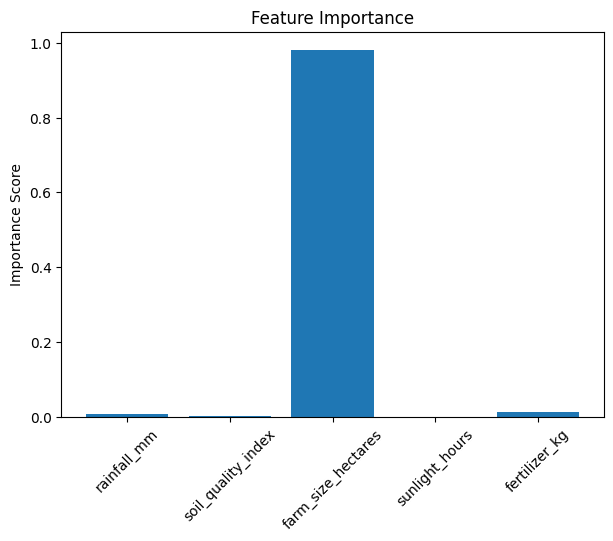

In [3]:
import matplotlib.pyplot as plt

# FEATURE IMPORTANCE
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(7,5))
plt.bar(feature_names, importances)
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.show()


In [4]:
# PART 3 — MAKE A MANUAL PREDICTION

# Example: enter your own values
input_data = pd.DataFrame({
    'rainfall_mm': [1500],
    'soil_quality_index': [7],
    'farm_size_hectares': [500],
    'sunlight_hours': [8],
    'fertilizer_kg': [1200]
})

predicted_yield = model.predict(input_data)[0]
predicted_yield


np.float64(335.39)

## Conclusion – Part 1 (Practical)

- **Model Performance:**  
  The Random Forest Regression model was successfully trained on the `crop_yield_data.csv` dataset.  
  - R² ≈ 0.9983 → Indicates that the input features almost perfectly explain the variance in crop yield.

- **Most Influential Feature:**  
  - `farm_size_hectares` contributed the highest importance in predicting crop yield.

- **Sample Manual Prediction:**  
  Using the following input values:  
  - Rainfall = 1500 mm  
  - Soil Quality Index = 7  
  - Farm Size = 500 hectares  
  - Sunlight = 8 hours  
  - Fertilizer = 1200 kg  

  → The model predicted approximately **335.39 tons per hectare**.

- **Summary:**  
  The model demonstrates strong predictive capability and can be used to support farm planning, resource allocation, and early yield forecasting.
